In [1]:
from Initializer import *
from Mutator import *
from Recombiner import *
from Selector import *
from Terminator import *
from DifferentialEvolution import DifferentialEvolution

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from EvolutionPlotter import *

## Hyperparameters: F vs. CR values for P1 - best / binomial

In [3]:
#pop size
NP = 90
#scale Factor
F_values = np.arange(0.3, 0.9, 0.1)
#crossover rate
Cr_values = np.arange(0.3, 0.9, 0.1)

In [18]:
# choose problem
problem = Problem(1)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
terminator = [maxItTerminator(500)]

In [19]:
best_scores = np.zeros(shape=(F_values.shape[0], Cr_values.shape[0]))
runs_per_config = 3

for i, F in enumerate(F_values):
    for j, Cr in enumerate(Cr_values):
        # Choose your operators
        mutator = bestMutator(F, problem)
        recombiner = BinomialCrossover(Cr, problem)
        selector = DEselector()
        for k in range(runs_per_config):
            DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)
            bestIndividual, results, generations = DE.run()
            best_scores[i,j] += bestIndividual.targFuncVal
        best_scores[i,j] /= runs_per_config
        print('F: %f, Cr: %f, score: %d' % (F, Cr, best_scores[i,j]))

F: 0.300000, Cr: 0.300000, score: 1528648
F: 0.300000, Cr: 0.400000, score: 1463483
F: 0.300000, Cr: 0.500000, score: 1285392
F: 0.300000, Cr: 0.600000, score: 1328711
F: 0.300000, Cr: 0.700000, score: 1365243
F: 0.300000, Cr: 0.800000, score: 1073514
F: 0.300000, Cr: 0.900000, score: 874585
F: 0.400000, Cr: 0.300000, score: 1498634
F: 0.400000, Cr: 0.400000, score: 1541691
F: 0.400000, Cr: 0.500000, score: 1543842
F: 0.400000, Cr: 0.600000, score: 1333509
F: 0.400000, Cr: 0.700000, score: 1322201
F: 0.400000, Cr: 0.800000, score: 1307575
F: 0.400000, Cr: 0.900000, score: 1294411
F: 0.500000, Cr: 0.300000, score: 1776963
F: 0.500000, Cr: 0.400000, score: 1638217
F: 0.500000, Cr: 0.500000, score: 1679409
F: 0.500000, Cr: 0.600000, score: 1543275
F: 0.500000, Cr: 0.700000, score: 1453228
F: 0.500000, Cr: 0.800000, score: 1418043
F: 0.500000, Cr: 0.900000, score: 1285001
F: 0.600000, Cr: 0.300000, score: 1757646
F: 0.600000, Cr: 0.400000, score: 1770018
F: 0.600000, Cr: 0.500000, score: 1

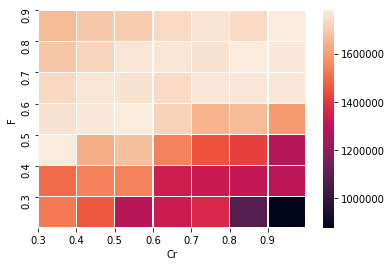

In [20]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(Cr_values)))
ax.set_yticks(np.arange(len(F_values)))
ax.set_xticklabels(np.round(Cr_values,2))
ax.set_yticklabels(np.flip(np.round(F_values,2),axis=0))
ax.set_xlabel('Cr')
ax.set_ylabel('F')
plt.show()

Best results around / above diagonal around the medium values of F / Cr. 

## Hyperparameters: F vs. CR values for P1 - rand / exponential

In [21]:
#pop size
NP = 90
#scale Factor
F_values = np.arange(0.3, 0.9, 0.1)
#crossover rate
Cr_values = np.arange(0.3, 0.9, 0.1)

In [22]:
# choose problem
problem = Problem(1)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
terminator = [maxItTerminator(500)]

In [23]:
best_scores = np.zeros(shape=(F_values.shape[0], Cr_values.shape[0]))
runs_per_config = 3

for i, F in enumerate(F_values):
    for j, Cr in enumerate(Cr_values):
        # Choose your operators
        mutator = randMutator(F, problem)
        recombiner = ExponentialCrossover(Cr, problem)
        selector = DEselector()
        for k in range(runs_per_config):
            DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)
            bestIndividual, results, generations = DE.run()
            best_scores[i,j] += bestIndividual.targFuncVal
        best_scores[i,j] /= runs_per_config
        print('F: %f, Cr: %f, score: %d' % (F, Cr, best_scores[i,j]))

F: 0.300000, Cr: 0.300000, score: 569587
F: 0.300000, Cr: 0.400000, score: 723511
F: 0.300000, Cr: 0.500000, score: 1014950
F: 0.300000, Cr: 0.600000, score: 1199368
F: 0.300000, Cr: 0.700000, score: 1379400
F: 0.300000, Cr: 0.800000, score: 1529798
F: 0.300000, Cr: 0.900000, score: 1578129
F: 0.400000, Cr: 0.300000, score: 665074
F: 0.400000, Cr: 0.400000, score: 591186
F: 0.400000, Cr: 0.500000, score: 831485
F: 0.400000, Cr: 0.600000, score: 1020548
F: 0.400000, Cr: 0.700000, score: 1343063
F: 0.400000, Cr: 0.800000, score: 1593546
F: 0.400000, Cr: 0.900000, score: 1610866
F: 0.500000, Cr: 0.300000, score: 632163
F: 0.500000, Cr: 0.400000, score: 719060
F: 0.500000, Cr: 0.500000, score: 1074300
F: 0.500000, Cr: 0.600000, score: 1129015
F: 0.500000, Cr: 0.700000, score: 1366000
F: 0.500000, Cr: 0.800000, score: 1556912
F: 0.500000, Cr: 0.900000, score: 1497637
F: 0.600000, Cr: 0.300000, score: 424265
F: 0.600000, Cr: 0.400000, score: 592217
F: 0.600000, Cr: 0.500000, score: 711764
F:

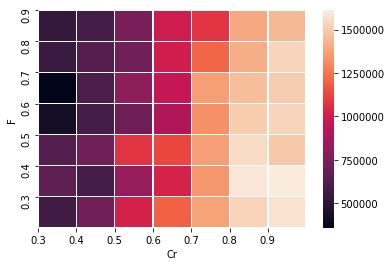

In [25]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(Cr_values)))
ax.set_yticks(np.arange(len(F_values)))
ax.set_xticklabels(np.round(Cr_values,2))
ax.set_yticklabels(np.flip(np.round(F_values,2),axis=0))
ax.set_xlabel('Cr')
ax.set_ylabel('F')
plt.show()

Stronger influence of Cr when using random mutator und exponential cross over.

## Hyperparameters: F / CR values vs. Population Size for P1 - best / binomial

In [106]:
#pop size
NP_values = np.array([10, 50, 100])
# scale / crossover rate
F_Cr_values = np.arange(0.3, 0.9, 0.1)

In [107]:
# choose problem
problem = Problem(1)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

# Choose your operators
terminator = [maxItTerminator(500)]

In [109]:
best_scores = np.zeros(shape=(F_Cr_values.shape[0], maxIterations.shape[0]))
runs_per_config = 3

for i, F_Cr_value in enumerate(F_Cr_values):
    for j, NP in enumerate(NP_values):
        # Choose your operators
        initializer = RandomInitializer(NP, xMin, xMax, problem)
        mutator = bestMutator(F_Cr_value, problem)
        recombiner = BinomialCrossover(F_Cr_value, problem)
        selector = DEselector()
        for k in range(runs_per_config):
            DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)
            bestIndividual, results, generations = DE.run()
            best_scores[i,j] += bestIndividual.targFuncVal
        best_scores[i,j] /= runs_per_config
        print('F: %f, Cr: %f, Population Size: %d, score: %d' % (F_Cr_value, F_Cr_value, NP, best_scores[i,j]))

F: 0.300000, Cr: 0.300000, Population Size: 10, score: 1038063
F: 0.300000, Cr: 0.300000, Population Size: 50, score: 1482623
F: 0.300000, Cr: 0.300000, Population Size: 100, score: 1516012
F: 0.400000, Cr: 0.400000, Population Size: 10, score: 971353
F: 0.400000, Cr: 0.400000, Population Size: 50, score: 1355350
F: 0.400000, Cr: 0.400000, Population Size: 100, score: 1578907
F: 0.500000, Cr: 0.500000, Population Size: 10, score: 1162649
F: 0.500000, Cr: 0.500000, Population Size: 50, score: 1446370
F: 0.500000, Cr: 0.500000, Population Size: 100, score: 1461597
F: 0.600000, Cr: 0.600000, Population Size: 10, score: 1297437
F: 0.600000, Cr: 0.600000, Population Size: 50, score: 1417093
F: 0.600000, Cr: 0.600000, Population Size: 100, score: 1772134
F: 0.700000, Cr: 0.700000, Population Size: 10, score: 1470285
F: 0.700000, Cr: 0.700000, Population Size: 50, score: 1680589
F: 0.700000, Cr: 0.700000, Population Size: 100, score: 1780233
F: 0.800000, Cr: 0.800000, Population Size: 10, sco

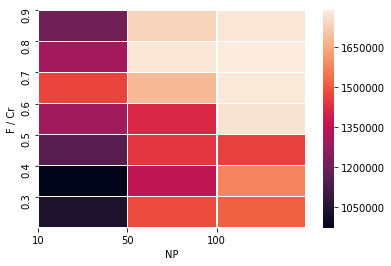

In [116]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(NP_values)))
ax.set_yticks(np.arange(len(F_Cr_values)))
ax.set_xticklabels(np.round(NP_values,2))
ax.set_yticklabels(np.flip(np.round(F_Cr_values,2),axis=0))
ax.set_xlabel('NP')
ax.set_ylabel('F / Cr')
plt.show()

The lower F / Cr the higher NP needs to be for same score level.

## Solution & Development of populations for P1

In [138]:
#pop size
NP = 90
#scale Factor
F = 0.6
#crossover rate
Cr = 0.5

In [16]:
# choose problem
problem = Problem(1)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

### Random / Exponential

In [17]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = randMutator(F, problem)
recombiner = ExponentialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

1312854.3435311397


### Best / Binomial

In [18]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = bestMutator(F, problem)
recombiner = BinomialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

1788931.7797298487


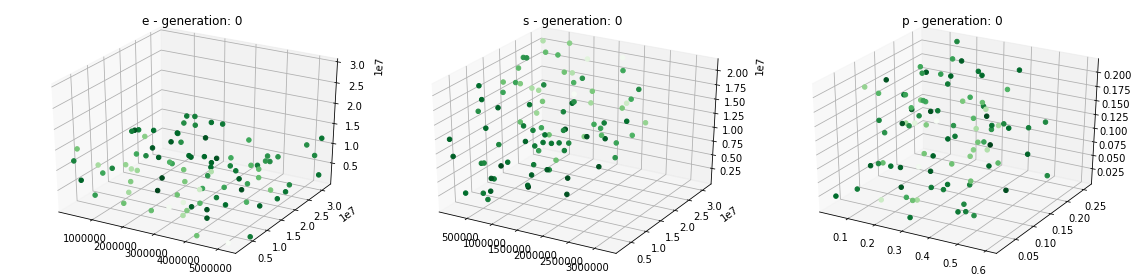

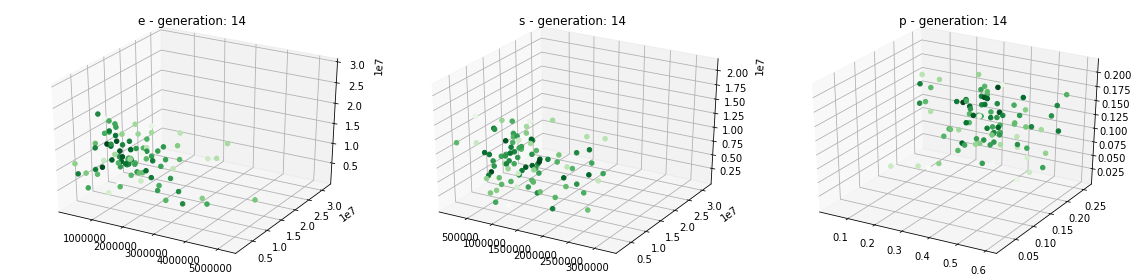

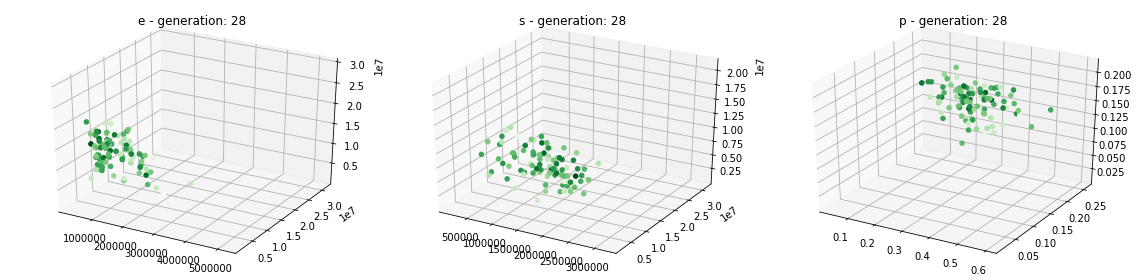

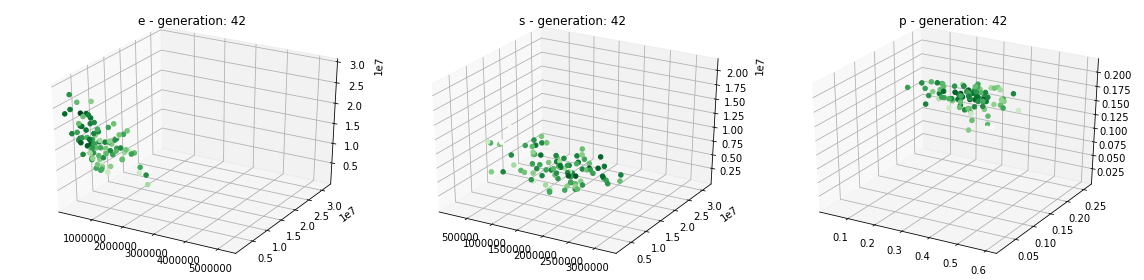

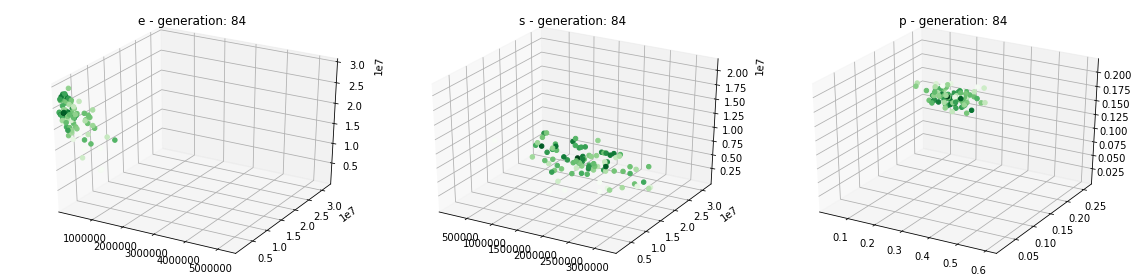

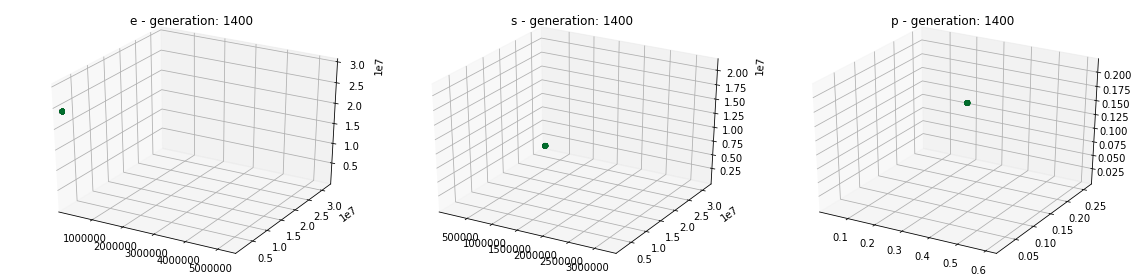

In [19]:
n = len(generations) // 100
gs = [0, n*1, n*2, n*3, n*6, n*100]

plot3D_parameters(generations, gs)

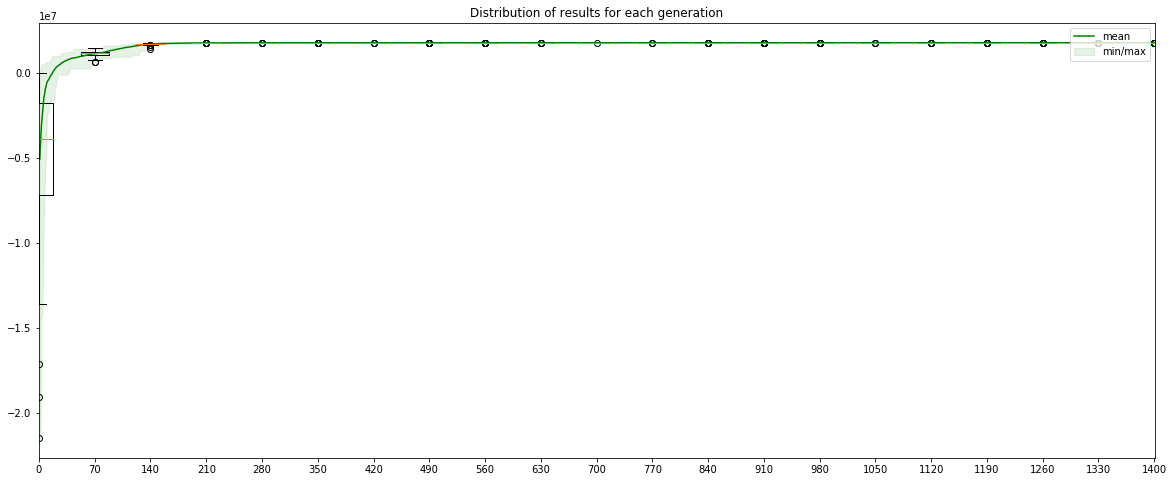

In [20]:
plot_evolution(results, 20)

## Solution & Development of populations for P2

In [21]:
#pop size
NP = 90
#scale Factor
F = 0.6
#crossover rate
Cr = 0.5

In [22]:
# choose problem
problem = Problem(2)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

### Random / Exponential

In [23]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = randMutator(F, problem)
recombiner = ExponentialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

1607803.055868499


### Best / Binomial

In [24]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = bestMutator(F, problem)
recombiner = BinomialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

1793405.8793623522


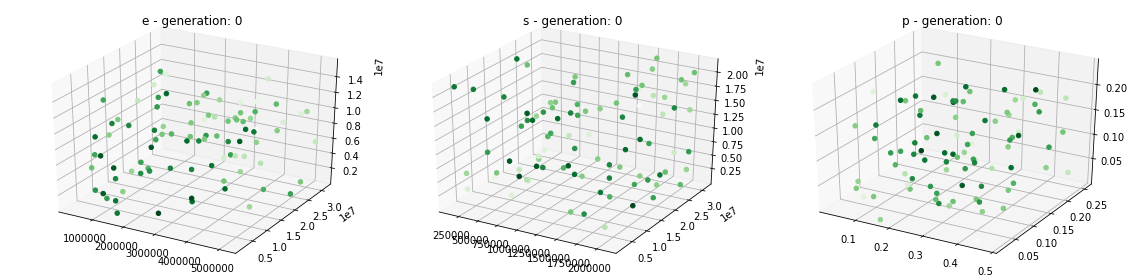

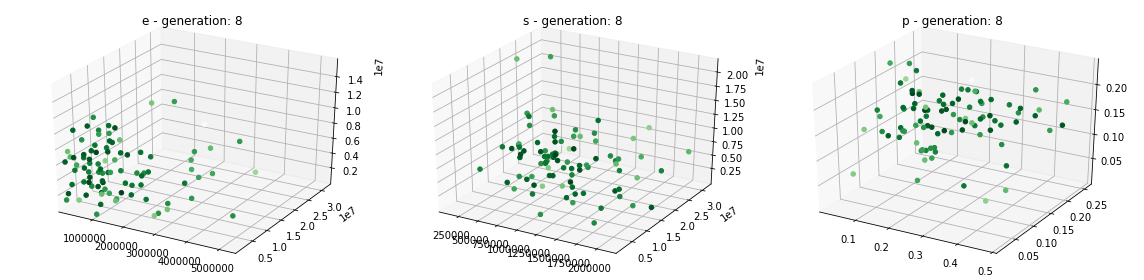

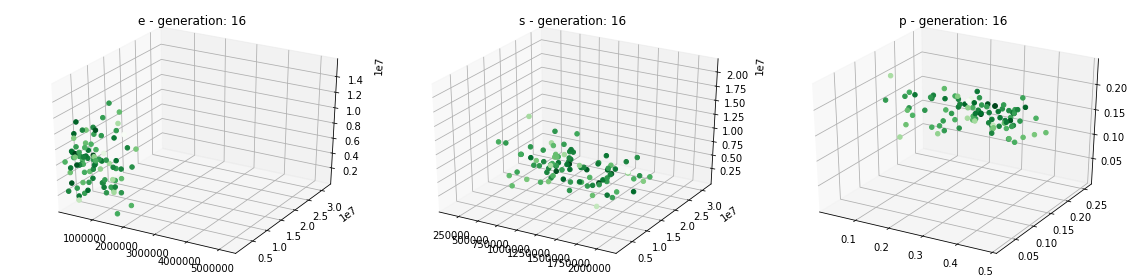

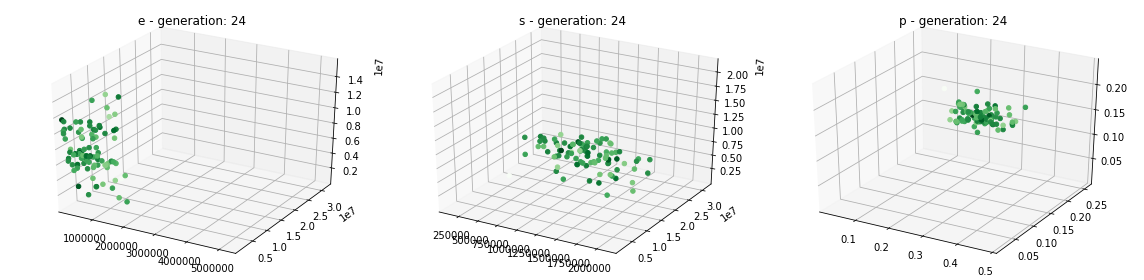

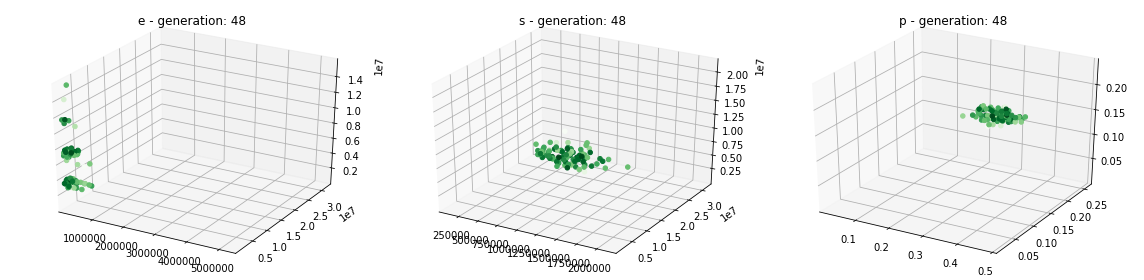

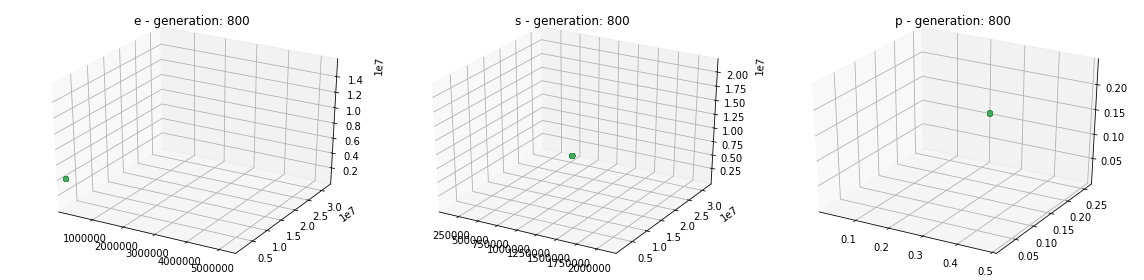

In [25]:
n = len(generations) // 100
gs = [0, n*1, n*2, n*3, n*6, n*100]

plot3D_parameters(generations, gs)

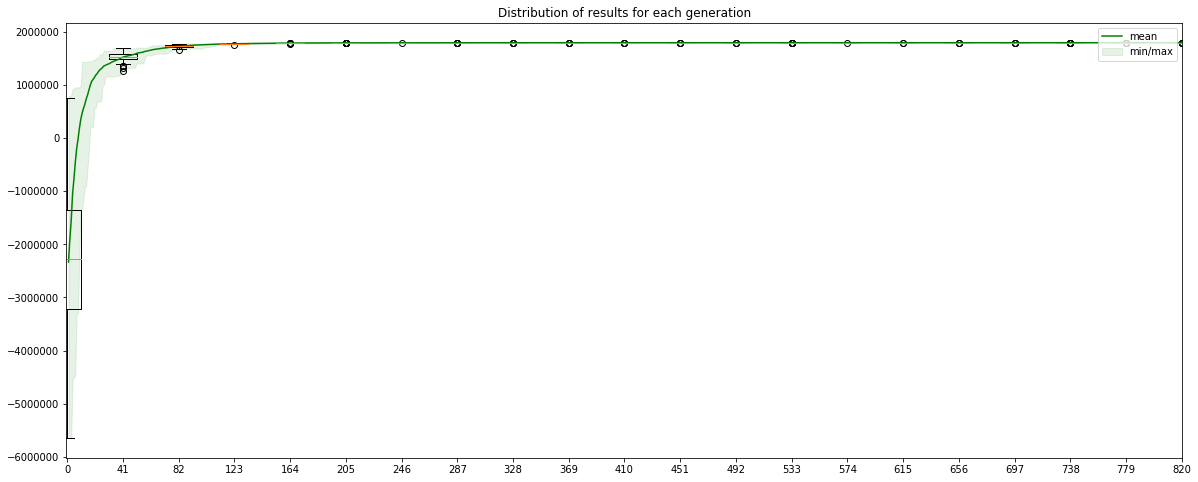

In [26]:
plot_evolution(results, 20)

...

## Solution & Development of populations for P3

In [27]:
#pop size
NP = 90
#scale Factor
F = 0.6
#crossover rate
Cr = 0.5

In [28]:
# choose problem
problem = Problem(3)
#set xMin
xMin = np.zeros(9)
#set xMax (what are good values here?)
xMax = np.concatenate((np.array(problem.k) * np.array(problem.m), problem.md, problem.mp))
xMax *= [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]

### Random / Exponential

In [29]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = randMutator(F, problem)
recombiner = ExponentialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

186348.0697070784


### Best / Binomial

In [30]:
# Choose your operators
initializer = RandomInitializer(NP, xMin, xMax, problem)
mutator = bestMutator(F, problem)
recombiner = BinomialCrossover(Cr, problem)
selector = DEselector()
terminator = [maxItTerminator(4000), convergenceTerminator(maxIter=400)]
DE = DifferentialEvolution(initializer, selector, recombiner, mutator, terminator, False)

bestIndividual, results, generations = DE.run()
print(bestIndividual.targFuncVal)

365197.8526743492


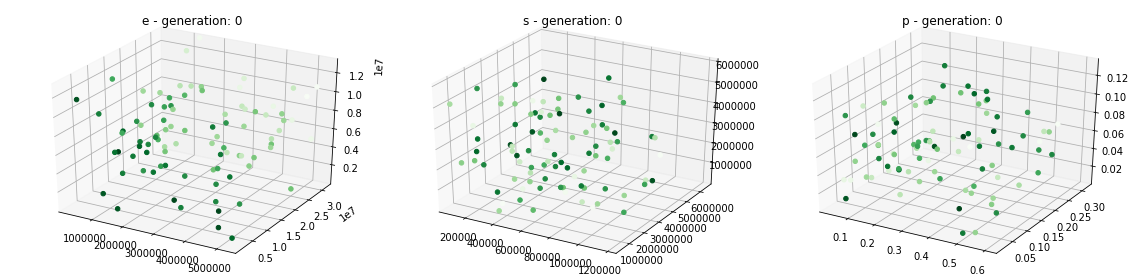

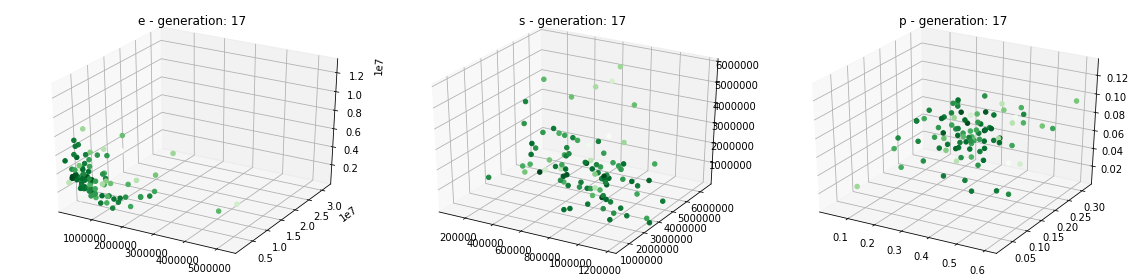

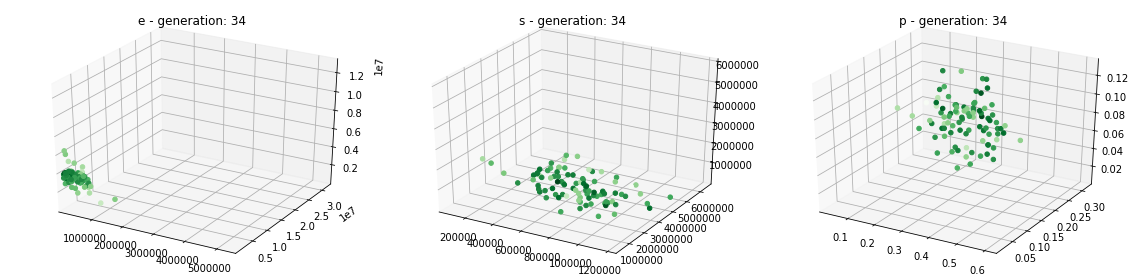

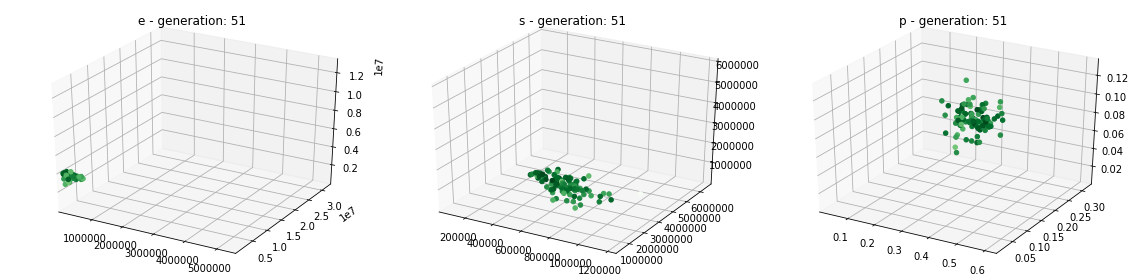

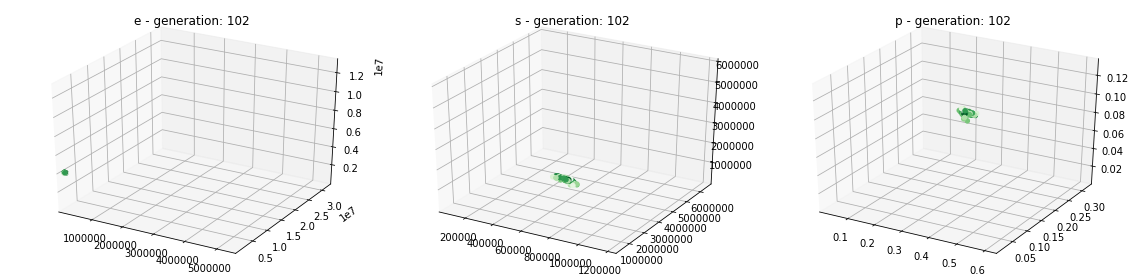

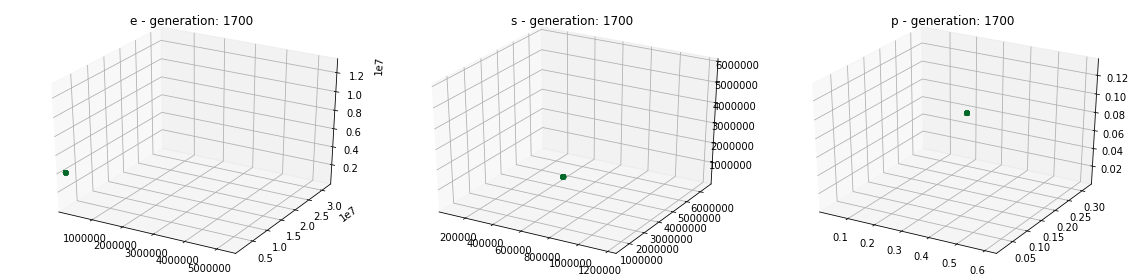

In [31]:
n = len(generations) // 100
gs = [0, n*1, n*2, n*3, n*6, n*100]

plot3D_parameters(generations, gs)

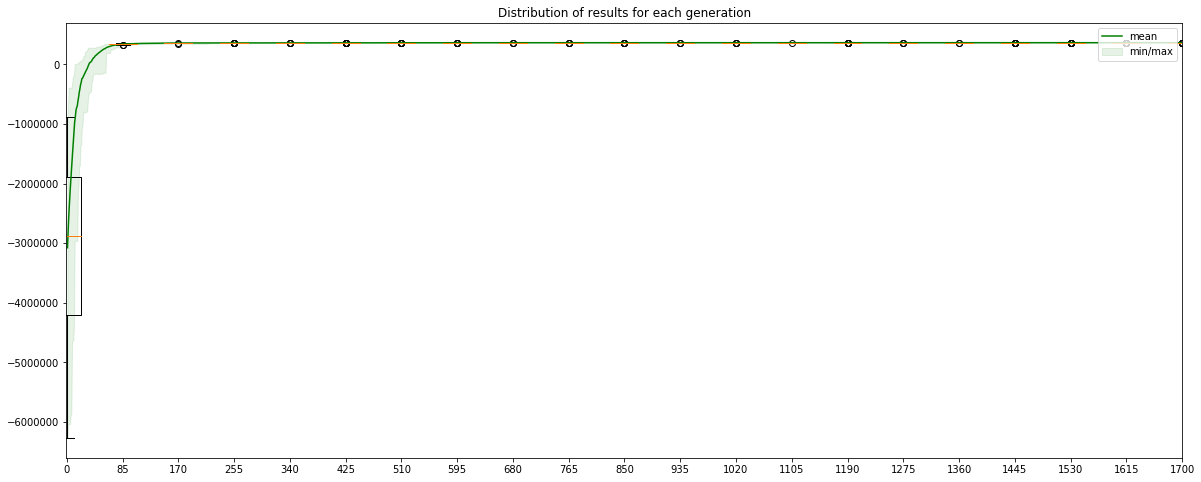

In [32]:
plot_evolution(results, 20)